In [4]:
load("Fig3_A_C.RData")
ls()
Baka_KHS_meQTL <- Baka_KHS
Himba_KHS_meQTL <- Himba_KHS
Himba_Baka_meQTL <- Himba_Baka
head(Baka_KHS_meQTL)
load("Fig3_D_F.RData")
Baka_KHS_hsq <- Baka_KHS
Himba_KHS_hsq <- Himba_KHS
Himba_Baka_hsq <- Himba_Baka
head(Baka_KHS_hsq)
load("Fig3_G_I.RData")
ls()
Baka_KHS_weights <- Baka_KHS_summary
Himba_KHS_weights <- Himba_KHS_summary
Himba_Baka_weights <- Himba_Baka_summary
head(Himba_Baka_weights)

[1] "Baka_KHS"           "Baka_KHS_hsq"       "Baka_KHS_meQTL"    
 [4] "Baka_KHS_summary"   "Baka_KHS_weights"   "fig3_row1"         
 [7] "Himba_Baka"         "Himba_Baka_hsq"     "Himba_Baka_meQTL"  
[10] "Himba_Baka_summary" "Himba_Baka_weights" "Himba_KHS"         
[13] "Himba_KHS_hsq"      "Himba_KHS_meQTL"    "Himba_KHS_summary" 
[16] "Himba_KHS_weights"  "plot1"              "plot2"             
[19] "plot3"              "popColours"

cpg,Baka_snp,KHS_snp,Baka_weight,KHS_weight
<chr>,<chr>,<chr>,<dbl>,<dbl>
cg00024416,22:24240340:A:G,22:24240340:G:A,0.13470937,0.15269770
cg00146027,10:33299247:C:T,10:33299247:C:T,0.15185143,0.16896964
cg00231771,6:35748086:G:T,6:35748086:G:T,-0.02787717,-0.02694967
cg00246547,2:86312185:C:T,2:86312185:C:T,0.21836436,0.15813457
cg00315563,3:182238748:T:C,3:182238748:T:C,0.13369158,0.06402224
cg00549601,12:52183485:C:T,12:52183485:C:T,-0.16729854,-0.11730731


,Baka_hsq,KHS_hsq
,<dbl>,<dbl>
1,0.948,0.324
2,0.791,0.593
3,0.864,0.674
4,0.875,0.667
5,0.472,0.293
6,0.578,0.491


[1] "Baka_KHS"           "Baka_KHS_hsq"       "Baka_KHS_meQTL"    
 [4] "Baka_KHS_summary"   "Baka_KHS_weights"   "fig3_row1"         
 [7] "Himba_Baka"         "Himba_Baka_hsq"     "Himba_Baka_meQTL"  
[10] "Himba_Baka_summary" "Himba_Baka_weights" "Himba_KHS"         
[13] "Himba_KHS_hsq"      "Himba_KHS_meQTL"    "Himba_KHS_summary" 
[16] "Himba_KHS_weights"  "plot1"              "plot2"             
[19] "plot3"              "popColours"

Site,SNP,id,Model_Himba,Model_Baka,effect_Himba,effect_Baka,scaled_effect_Himba,scaled_effect_Baka
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
cg27663476,15:80534200:A:G,cg27663476_15:80534200:A:G,enet,enet,-0.011172610,1.400806e-03,-0.2244397,0.05176132
cg27663476,15:80538142:C:T,cg27663476_15:80538142:C:T,enet,enet,-0.008574002,4.683187e-05,-0.1673559,0.02201848
cg27663476,15:80539389:A:G,cg27663476_15:80539389:A:G,enet,enet,-0.006288327,8.133082e-06,-0.1171464,0.02116838
cg27663476,15:80842689:C:T,cg27663476_15:80842689:C:T,enet,enet,0.013916020,5.069420e-02,0.3266839,1.13459257
cg27650985,5:176975693:A:G,cg27650985_5:176975693:A:G,enet,enet,-0.115314800,3.544537e-02,-2.5121381,0.79962051
cg27638615,2:202686231:T:C,cg27638615_2:202686231:T:C,enet,enet,-0.012213100,-1.777364e-01,-0.2472963,-3.88335756


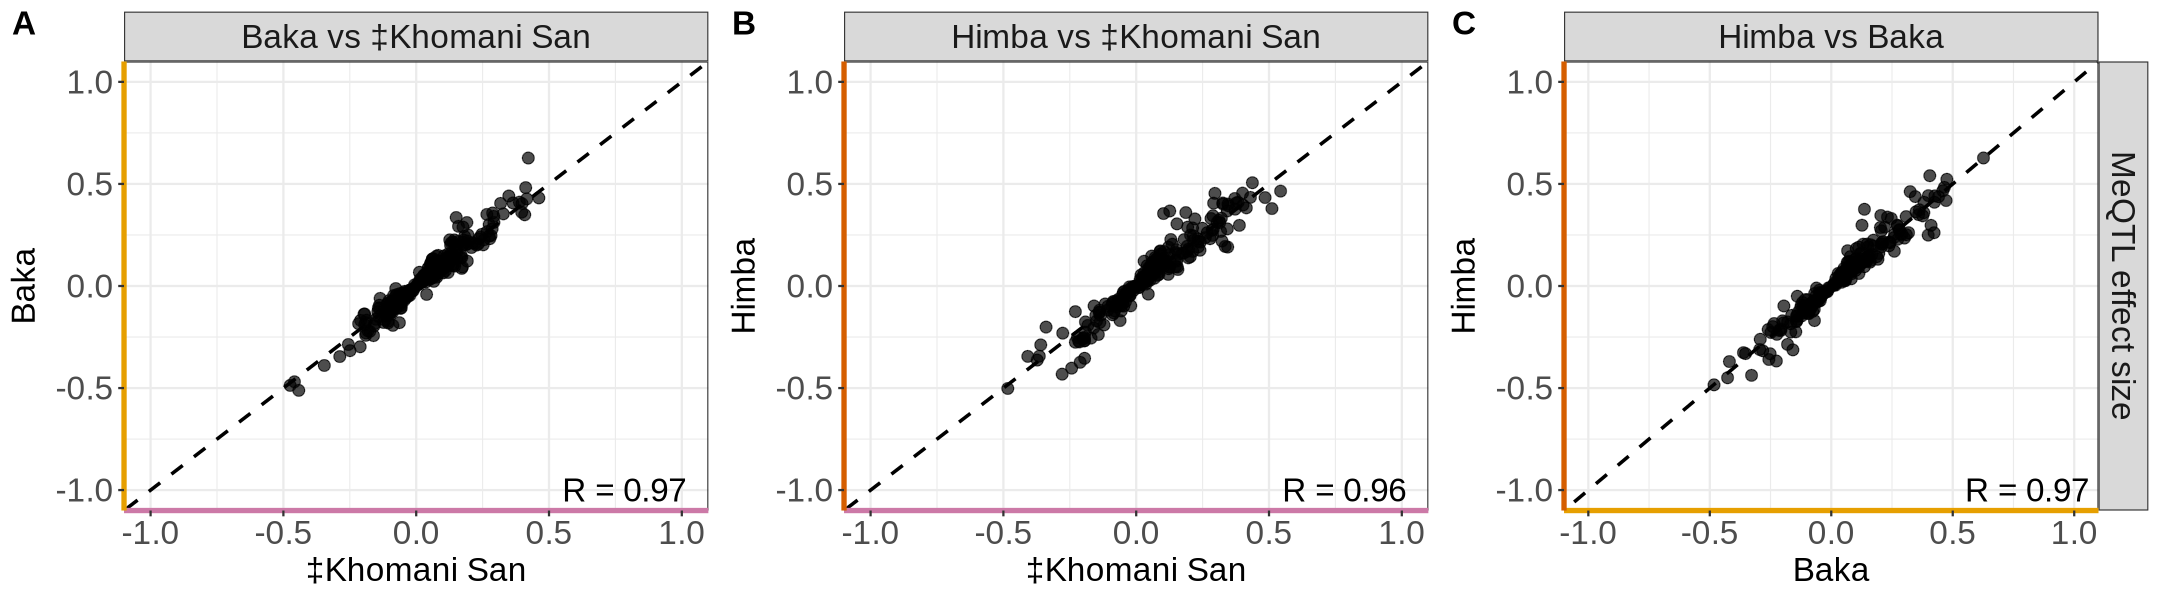

In [5]:
library(dplyr)
library(tibble)
library(ggplot2)
library(cowplot)
options(warn = -1) 
options(repr.plot.width = 18, repr.plot.height = 5)

#pop colors same as figure 1######################
popColours <- c("Himba" = rgb(213/255, 94/255, 0/255), # red
                "KHS" = rgb(204/255, 121/255, 167/255), # purple/magenta
                "Baka" = rgb(230/255, 159/255, 0/255))
         
###############################################
##### KHS vs Baka###
Baka_KHS_meQTL$comparison <- rep("Baka vs \u2021Khomani San", nrow(Baka_KHS_meQTL))
Himba_KHS_meQTL$comparison <- rep("Himba vs \u2021Khomani San", nrow(Himba_KHS_meQTL))
Himba_Baka_meQTL$comparison <- rep("Himba vs Baka", nrow(Himba_Baka_meQTL))


####################################################
plot1 <- ggplot(Baka_KHS_meQTL, aes(x = KHS_weight, y = Baka_weight)) +
  geom_point(color = "black", alpha = 0.7, size = 3) +  # Add scatter points
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +  # One-to-one line
  labs(
    y = "Baka",
    x = "\u2021Khomani San"
  ) +
  coord_cartesian(xlim = c(-1, 1), ylim = c(-1, 1)) +  # Adjust axis limits as needed
  theme_bw(base_size = 14) +  # Set a base font size
  theme(
    strip.text = element_text(size = 20),
    axis.line.y = element_line(colour = popColours["Baka"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20)
  ) +
 facet_wrap(~comparison, scales = "free") +
  annotate(
    "text",
    x = .55,  # Place the annotation close to the right side of the plot
    y = -1,  # Place the annotation close to the bottom of the plot
    label = paste0(
      "R = ", round(cor(Baka_KHS_meQTL$Baka_weight, Baka_KHS_meQTL$KHS_weight, use = "complete.obs"), 2)
    ),
    size = 7,
    color = "black",
    hjust = 0
  )

plot2 <- ggplot(Himba_KHS_meQTL, aes(x = KHS_weight, y = Himba_weight)) +
  geom_point(color = "black", alpha = 0.7, size = 3) +  # Add scatter points
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +  # One-to-one line
  labs(
    y = "Himba",
    x = "\u2021Khomani San"
  ) +
 facet_wrap(~comparison, scales = "free") +
  coord_cartesian(xlim = c(-1, 1), ylim = c(-1, 1)) +  # Adjust axis limits as needed
  theme_bw(base_size = 14) +  # Set a base font size
  theme(
       strip.text = element_text(size = 20),
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20)
  ) +
  annotate(
    "text",
    x = .55,  # Place the annotation close to the right side of the plot
    y = -1,  # Place the annotation close to the bottom of the plot
    label = paste0(
      "R = ", round(cor(Himba_KHS_meQTL$Himba_weight, Himba_KHS_meQTL$KHS_weight, use = "complete.obs"), 2)
    ),
    size = 7,
    color = "black",
    hjust = 0
  )

plot3 <- ggplot(Himba_Baka_meQTL, aes(x = Baka_weight, y = Himba_weight)) +
  geom_point(color = "black", alpha = 0.7, size = 3) +  # Add scatter points
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +  # One-to-one line
  labs(
    y = "Himba",
    x = "Baka"
  ) +
 facet_grid("MeQTL effect size"~comparison, scales = "free") +
  coord_cartesian(xlim = c(-1, 1), ylim = c(-1, 1)) +  # Adjust axis limits as needed
  theme_bw(base_size = 14) +  # Set a base font size
  theme(
       strip.text = element_text(size = 20),
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["Baka"], size = 1.5),
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20)
  ) +
  annotate(
    "text",
    x = .55,  # Place the annotation close to the right side of the plot
    y = -1,  # Place the annotation close to the bottom of the plot
    label = paste0(
      "R = ", round(cor(Himba_Baka_meQTL$Himba_weight, Himba_Baka_meQTL$Baka_weight, use = "complete.obs"), 2)
    ),
    size = 7,
    color = "black",
    hjust = 0
  )

fig3_row1 <- plot_grid(plot1, plot2, plot3, ncol = 3, nrow = 1, labels = c("A", "B", "C"), label_size = 20, rel_widths = c(1, 1, 1))

# Display the combined plot
fig3_row1

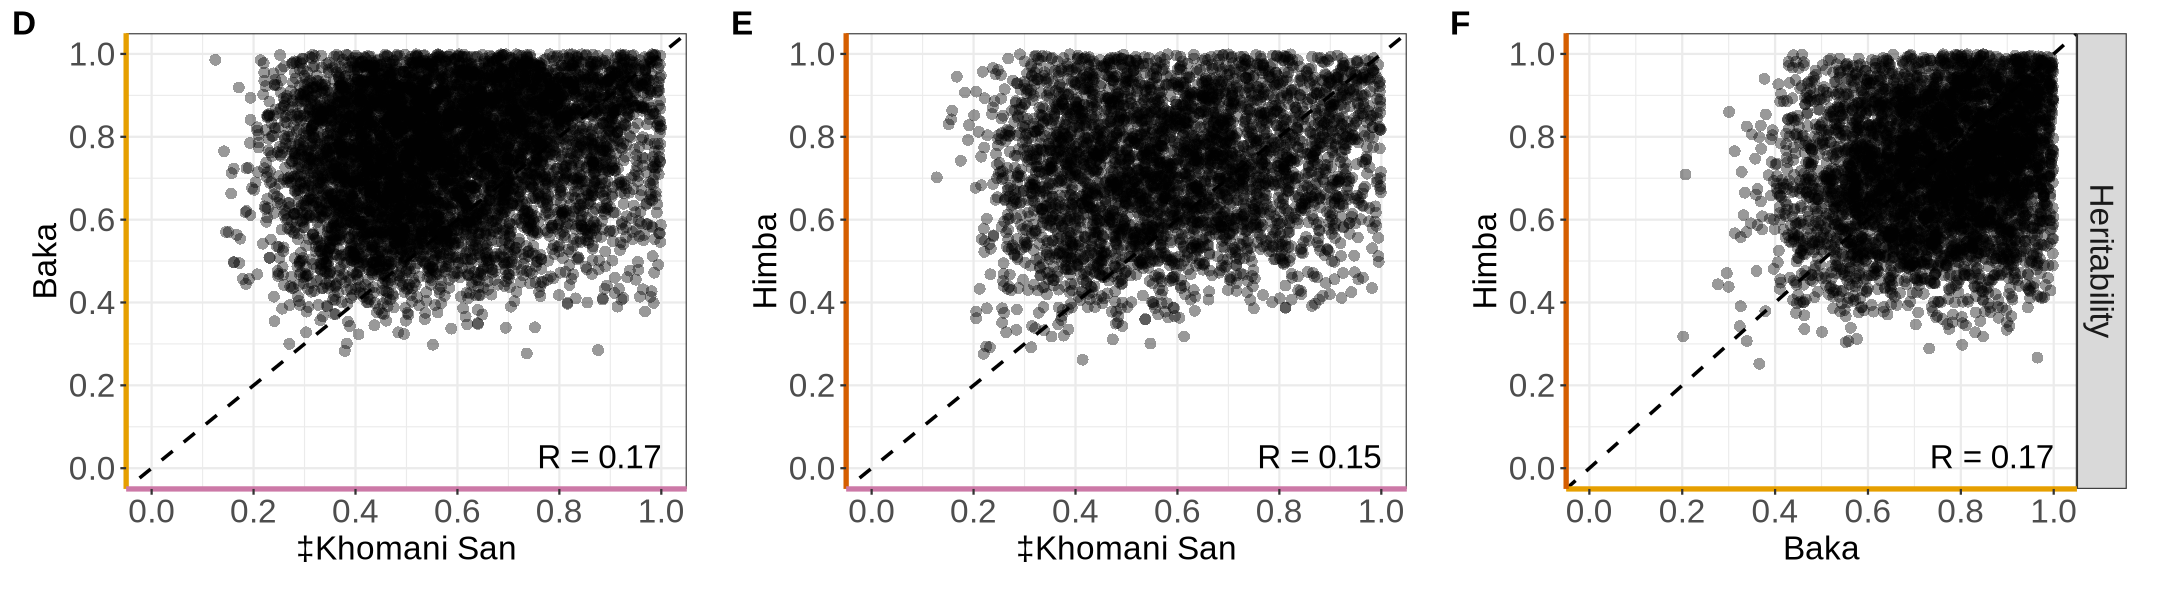

In [6]:

# Plot 1
plot1 <- ggplot(Baka_KHS_hsq, aes(x = KHS_hsq, y = Baka_hsq)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +  # Add scatter points with custom settings
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +  # One-to-one line
  labs(
    y = "Baka",
    x = "\u2021Khomani San"
  ) +
  coord_cartesian(xlim = c(0, 1), ylim = c(0, 1)) +  # Adjust axis limits as needed
   theme_bw(base_size = 14)  +  # Set base font size
  theme(
    legend.position = "none",
     axis.line.y = element_line(colour = popColours["Baka"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +  # Set y-axis labels from 0 to 1 by 0.1
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +  # Set x-axis labels from 0 to 1 by 0.1
  annotate(
    "text",
    x = 1,  # Place the annotation close to the right side of the plot
    y = 0,  # Place the annotation close to the bottom of the plot
    label = paste0(
      "R = ", round(cor(Baka_KHS_hsq$Baka_hsq, Baka_KHS_hsq$KHS_hsq, use = "complete.obs"), 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,  # Align text to the right
    vjust = 0  # Align text to the bottom
  )

# Plot 2
plot2 <- ggplot(Himba_KHS_hsq, aes(x = KHS_hsq, y = Himba_hsq)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +  # Add scatter points with custom settings
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +  # One-to-one line
  labs(
    y = "Himba",
    x = "\u2021Khomani San"
  ) +
  coord_cartesian(xlim = c(0, 1), ylim = c(0, 1)) +  # Adjust axis limits as needed
    theme_bw(base_size = 14)   +  # Set base font size
  theme(
    legend.position = "none",
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
   axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +  # Set y-axis labels from 0 to 1 by 0.1
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +  # Set x-axis labels from 0 to 1 by 0.1
  annotate(
    "text",
    x = 1,  # Place the annotation close to the right side of the plot
    y = 0,  # Place the annotation close to the bottom of the plot
    label = paste0(
      "R = ", round(cor(Himba_KHS_hsq$Himba_hsq, Himba_KHS_hsq$KHS_hsq, use = "complete.obs"), 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,  # Align text to the right
    vjust = 0  # Align text to the bottom
  )

# Plot 3
plot3 <- ggplot(Himba_Baka_hsq, aes(x = Baka_hsq, y = Himba_hsq)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +  # Add scatter points with custom settings
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +  # One-to-one line
  labs(
    y = "Himba",
    x = "Baka"
  ) +
  facet_grid("Heritability"~., scales = "free") + 
  coord_cartesian(xlim = c(0, 1), ylim = c(0, 1)) +  # Adjust axis limits as needed
    theme_bw(base_size = 14) +  # Set base font size
  theme(
      strip.text = element_text(size = 20),
    legend.position = "none",
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["Baka"], size = 1.5),
   axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +  # Set y-axis labels from 0 to 1 by 0.1
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +  # Set x-axis labels from 0 to 1 by 0.1
  annotate(
    "text",
    x = 1,  # Place the annotation close to the right side of the plot
    y = 0,  # Place the annotation close to the bottom of the plot
    label = paste0(
      "R = ", round(cor(Himba_Baka_hsq$Himba_hsq, Himba_Baka_hsq$Baka_hsq, use = "complete.obs"), 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,  # Align text to the right
    vjust = 0  # Align text to the bottom
  )

# Combine plots into a single figure
fig3_row2 <- plot_grid(plot1, plot2, plot3, ncol = 3, nrow = 1, labels = c("D", "E", "F"), label_size = 20, rel_widths = c(1, 1, 1))
fig3_row2

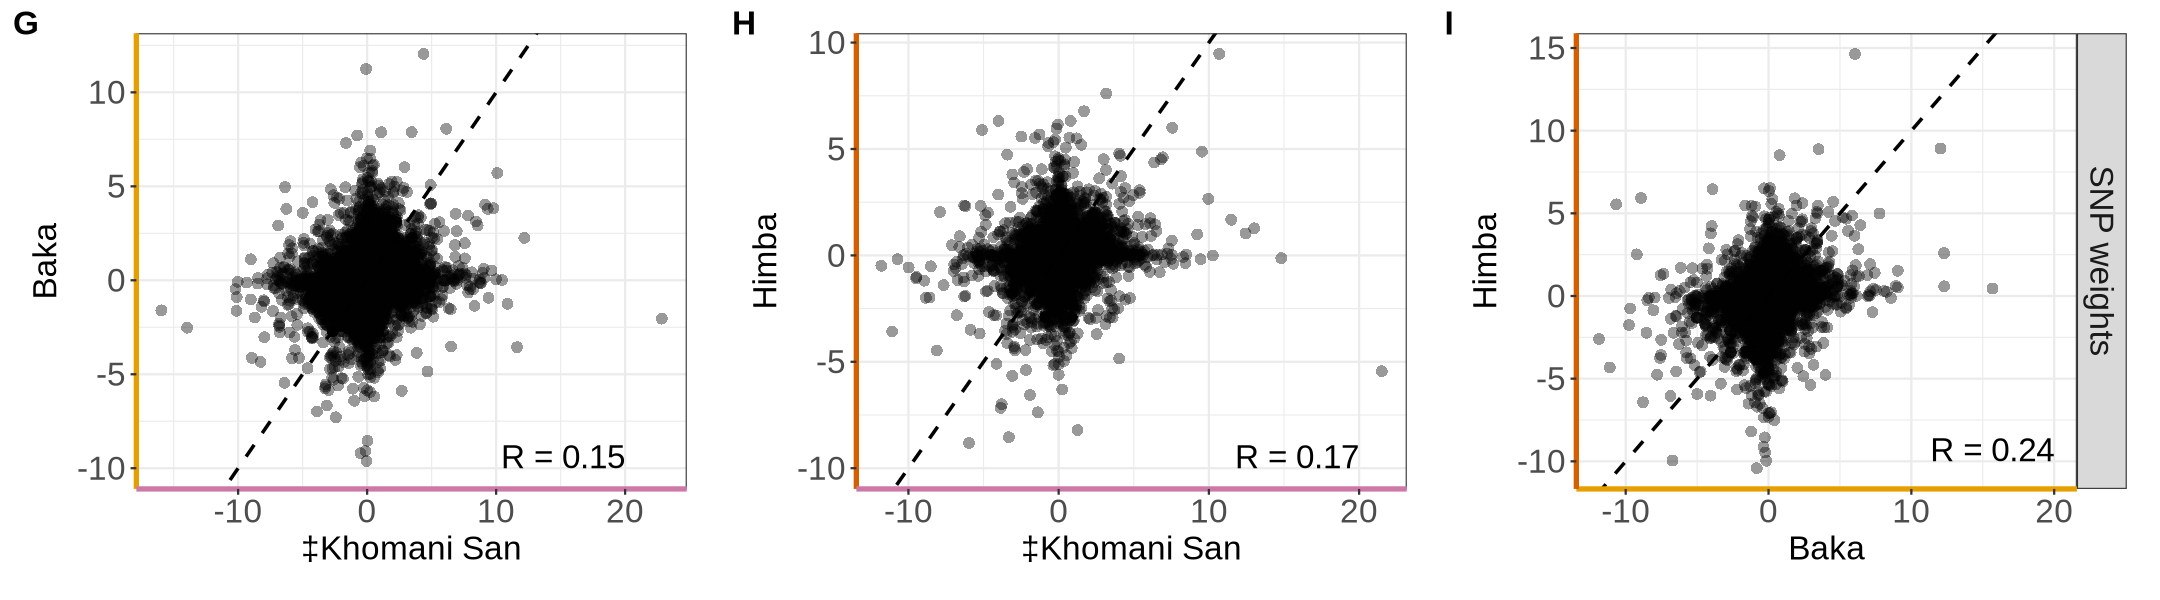

In [7]:
# Plot 1
plot1 <- ggplot(Baka_KHS_weights, aes(x = scaled_effect_KHS, y = scaled_effect_Baka)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +  # Add scatter points with custom settings
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +  # One-to-one line
  labs(
    y = "Baka",
    x = "\u2021Khomani San"
  ) +
   theme_bw(base_size = 14)  +  # Set base font size
  theme(
    legend.position = "none",
     axis.line.y = element_line(colour = popColours["Baka"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  annotate(
    "text",
    x = 20,  # Place the annotation close to the right side of the plot
    y = -10,  # Place the annotation close to the bottom of the plot
    label = paste0(
      "R = ", round(cor(Baka_KHS_weights$scaled_effect_Baka, Baka_KHS_weights$scaled_effect_KHS, use = "complete.obs"), 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,  # Align text to the right
    vjust = 0  # Align text to the bottom
  )

# Plot 2
plot2 <- ggplot(Himba_KHS_weights, aes(x = scaled_effect_KHS, y = scaled_effect_Himba)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +  # Add scatter points with custom settings
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +  # One-to-one line
  labs(
    y = "Himba",
    x = "\u2021Khomani San"
  ) +
    theme_bw(base_size = 14)   +  # Set base font size
  theme(
    legend.position = "none",
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
   axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  annotate(
    "text",
    x = 20,  # Place the annotation close to the right side of the plot
    y = -10,  # Place the annotation close to the bottom of the plot
    label = paste0(
      "R = ", round(cor(Himba_KHS_weights$scaled_effect_Himba, Himba_KHS_weights$scaled_effect_KHS, use = "complete.obs"), 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,  # Align text to the right
    vjust = 0  # Align text to the bottom
  )

# Plot 3
plot3 <- ggplot(Himba_Baka_weights, aes(x = scaled_effect_Baka, y = scaled_effect_Himba)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +  # Add scatter points with custom settings
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +  # One-to-one line
  labs(
    y = "Himba",
    x = "Baka"
  ) +
  facet_grid("SNP weights"~., scales = "free") + 
    theme_bw(base_size = 14) +  # Set base font size
  theme(
      strip.text = element_text(size = 20),
    legend.position = "none",
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["Baka"], size = 1.5),
   axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
   annotate(
    "text",
    x = 20,  # Place the annotation close to the right side of the plot
    y = -10,  # Place the annotation close to the bottom of the plot
    label = paste0(
      "R = ", round(cor(Himba_Baka_weights$scaled_effect_Himba, Himba_Baka_weights$scaled_effect_Baka, use = "complete.obs"), 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,  # Align text to the right
    vjust = 0  # Align text to the bottom
  )

# Combine plots into a single figure
fig3_row3 <- plot_grid(plot1, plot2, plot3, ncol = 3, nrow = 1, labels = c("G", "H", "I"), label_size = 20, rel_widths = c(1, 1, 1))
fig3_row3

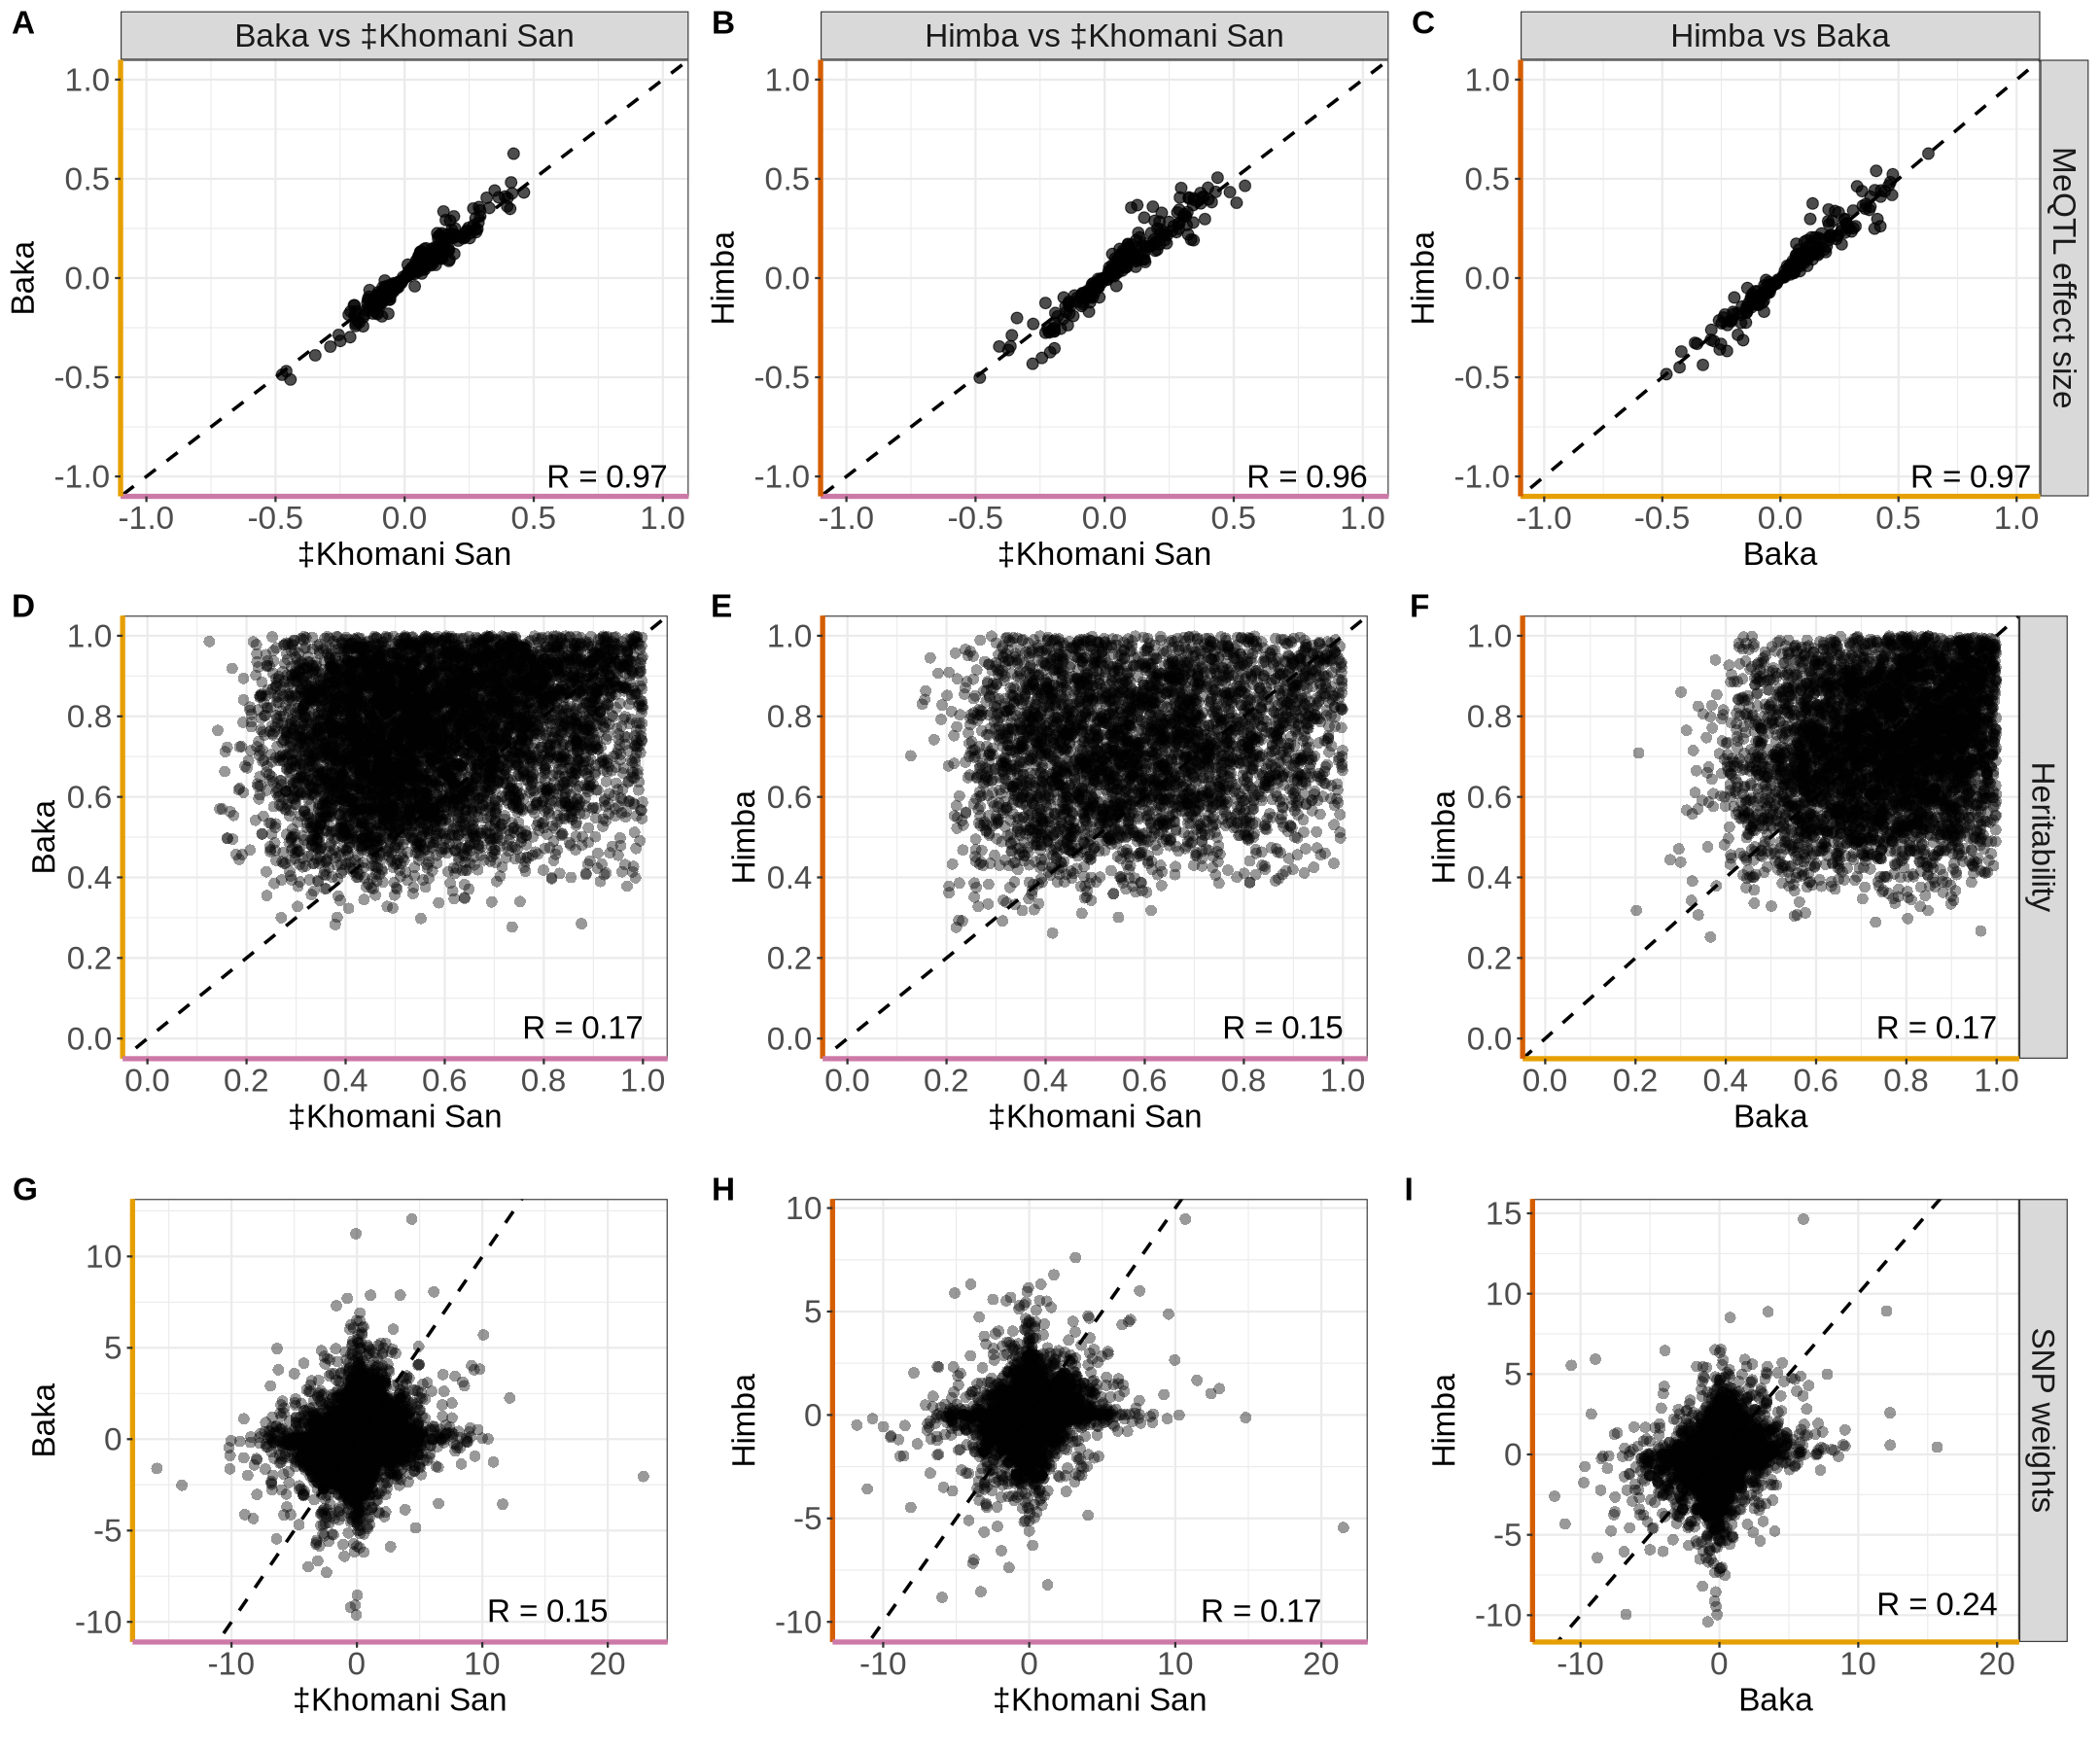

In [8]:
options(repr.plot.width = 18, repr.plot.height = 15)
plot_grid(fig3_row1, fig3_row2, fig3_row3, nrow=3)